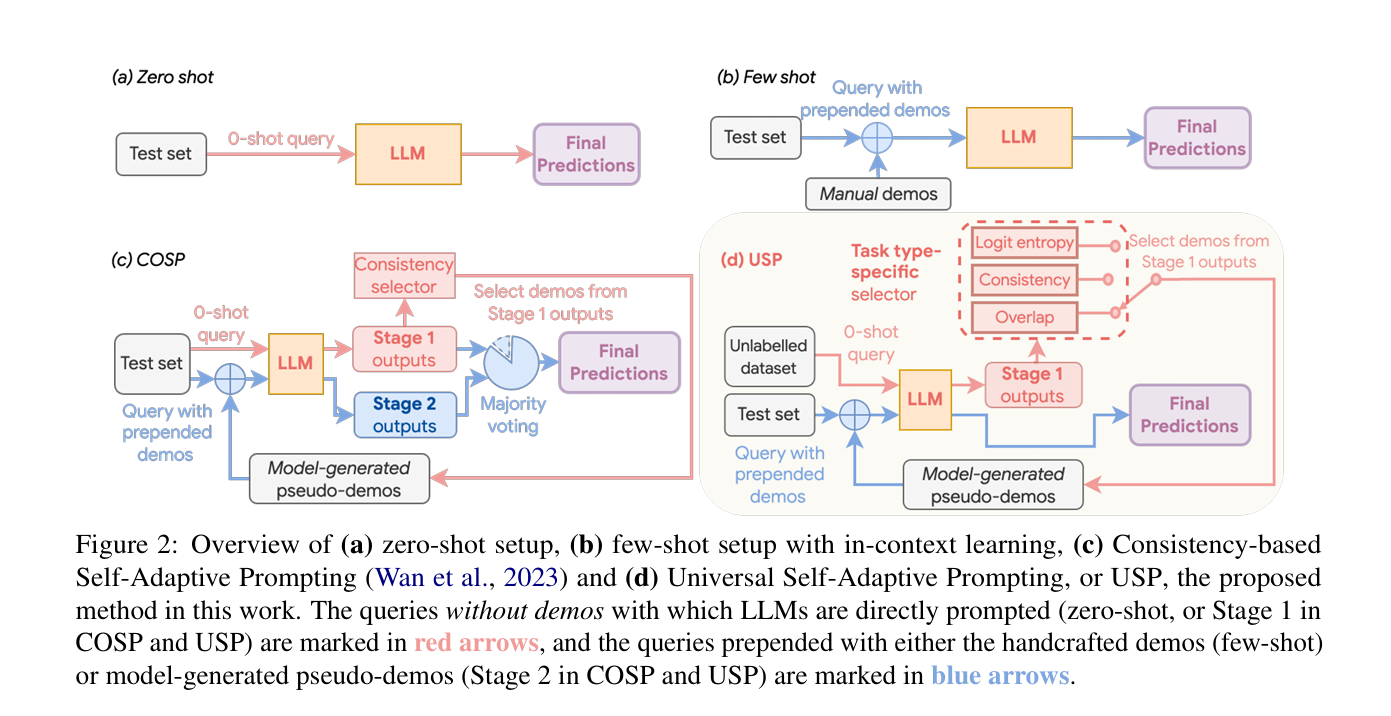

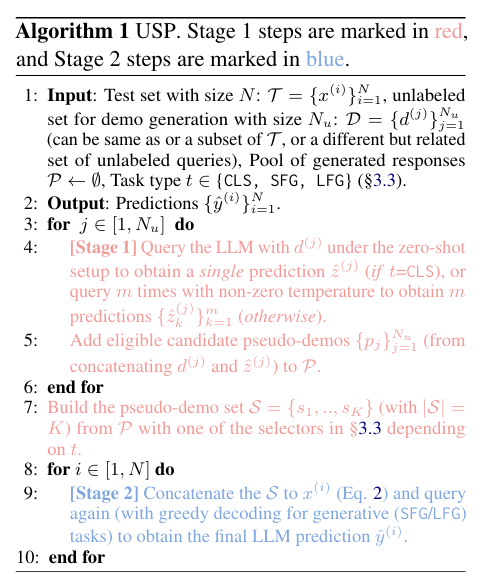

### **Tổng quan về USP (Universal Self-Adaptive Prompting)**  

Để giải quyết các thách thức đã nêu, USP được đề xuất với thiết kế chi tiết (Hình 2d và Thuật toán 1). USP chia sẻ một số điểm tương đồng ở cấp độ cao với COSP, nhưng cũng có nhiều điểm cải tiến quan trọng:  

- **Giống COSP:** USP cũng áp dụng phương pháp gồm hai giai đoạn:  
  - **Giai đoạn 1:** Các mô hình ngôn ngữ lớn (LLM) được gợi ý theo cách **zero-shot** để tạo ra một tập hợp các phản hồi ứng viên. Sau đó, một số "pseudo-demo" (phản hồi mô phỏng) được chọn.  
  - **Giai đoạn 2:** USP thêm các "pseudo-demo" này vào truy vấn kiểm tra theo cách **few-shot** (Phương trình (2)) và yêu cầu mô hình dự đoán lại kết quả cuối cùng.  

Dưới đây là các thiết kế chính của USP, đặc biệt những yếu tố giúp vượt qua các thách thức mà COSP không giải quyết được:  

---

### **1. Bộ chọn pseudo-demo theo từng loại tác vụ**  
- Bộ chọn "pseudo-demo" là trung tâm của USP, được thiết kế để chọn các cặp truy vấn-đáp án phù hợp nhất từ kết quả đầu ra zero-shot.  
- **Điểm khác biệt:** COSP chỉ sử dụng bộ chọn dựa trên tính nhất quán (consistency-based selector), khiến nó chỉ phù hợp với một số tác vụ giới hạn.  
- Trong khi đó, USP triển khai bộ chọn tùy theo từng loại tác vụ (được trình bày chi tiết trong §3.3), giúp tăng tính linh hoạt và khả năng tổng quát.  

---

### **2. Tách riêng tập kiểm tra và tập dữ liệu tạo demo**  
- **Thay vì dùng toàn bộ tập kiểm tra $ T $ trong Giai đoạn 1**, USP sử dụng một tập dữ liệu không gán nhãn $ D $:  
  - $ D $ có thể là toàn bộ tập $ T $, một phần của $ T $, hoặc thậm chí là một tập khác liên quan (chẳng hạn như tập dữ liệu mô phỏng do mô hình tự tạo).  
  - Mục đích duy nhất của $ D $ là tạo ra "pseudo-demo", giúp USP hoạt động ngay cả khi toàn bộ tập $ T $ chưa được biết trước.  
- **Ưu điểm:**  
  - USP yêu cầu ít mẫu không gán nhãn hơn, chỉ cần **64 mẫu trên mỗi tập dữ liệu**, nhưng vẫn tạo ra "pseudo-demo" chất lượng cao.  
  - Tiết kiệm tính toán vì chỉ cần lặp qua tập $ D $, thay vì toàn bộ tập $ T $.  

---

### **3. Loại bỏ sự phụ thuộc vào bỏ phiếu đa số**  
- **Nhược điểm của bỏ phiếu đa số (majority voting) trong COSP:**  
  - Tốn kém tính toán.  
  - Không khả thi khi "đa số" không được định nghĩa rõ ràng (chẳng hạn trong các tác vụ sáng tạo).  
- **USP cải tiến:**  
  - Trong Giai đoạn 2, USP sử dụng giải mã tham lam (greedy decoding) với **temperature = 0** để tạo ra dự đoán cuối cùng dựa trên **ước lượng hợp lý cực đại (MLE)**.  
  - **Tính tương thích:** USP vẫn có thể sử dụng bỏ phiếu đa số để cải thiện hiệu suất (nếu khả thi), nhưng không còn phụ thuộc vào nó để hoạt động.

---

### **Thuật toán 1 USP**  
- **Đầu vào:**  
  - Tập kiểm tra $ T $ kích thước $ N $: $ T = \{x(i)\}_{i=1}^N $.  
  - Tập không gán nhãn $ D $ kích thước $ N_u $: $ D = \{d(j)\}_{j=1}^{N_u} $.  
  - Tập ứng viên $ P = \emptyset $, loại tác vụ $ t \in \{\text{CLS, SFG, LFG}\} $.  

- **Giai đoạn 1 (dòng 3-6):**  
  - Gửi truy vấn zero-shot với $ d(j) $ để nhận dự đoán $ \hat{z}(j) $.  
  - Thêm các ứng viên $ \{p_j\}_{j=1}^{N_u} $ vào tập $ P $.  

- **Giai đoạn 2 (dòng 7-10):**  
  - Tạo bộ pseudo-demo $ S $ từ $ P $.  
  - Thêm $ S $ vào truy vấn $ x(i) $ và gửi lại để nhận dự đoán cuối cùng $ \hat{y}(i) $.  

USP mang lại hiệu suất cao hơn nhờ vào sự cải tiến ở từng giai đoạn, đồng thời mở rộng khả năng áp dụng cho các tác vụ khác nhau.

Đây là phần giải thích thuật toán USP (Unsupervised Prompting). Dưới đây là các bước được dịch và giải thích theo cách dễ hiểu hơn:

---

### Đầu vào và đầu ra:
**Đầu vào**:
- **T**: Tập kiểm tra với kích thước $ N $: $ T = \{x(i)\}_{i=1}^N $ (tập dữ liệu không có nhãn).
- **D**: Tập dữ liệu chưa gán nhãn để tạo ví dụ mẫu (demo) với kích thước $ N_u $: $ D = \{d(j)\}_{j=1}^{N_u} $.  
  (D có thể là một phần hoặc tập con của T, hoặc một tập dữ liệu khác nhưng liên quan).
- **P**: Tập hợp các phản hồi được tạo (ban đầu là rỗng, $ P \leftarrow \emptyset $).
- **t**: Loại tác vụ, gồm:
  - **CLS**: Phân loại (Classification).
  - **SFG**: Tạo văn bản ngắn (Short-form generation).
  - **LFG**: Tạo văn bản dài (Long-form generation).

**Đầu ra**:
- Dự đoán cuối cùng: $ \{\hat{y}(i)\}_{i=1}^N $.

---

### Các bước thuật toán:
#### **[Giai đoạn 1: Sinh pseudo-demo từ dữ liệu chưa gán nhãn]**
1. **(Dòng 3)** Lặp qua từng phần tử $ d(j) $ trong tập $ D $, với $ j \in [1, N_u] $:
   - Nếu là tác vụ **CLS**:
     - Thực hiện truy vấn (query) mô hình ngôn ngữ lớn (LLM) với $ d(j) $ ở chế độ **zero-shot** để nhận dự đoán $ \hat{z}(j) $.
   - Nếu là tác vụ khác (SFG/LFG):
     - Truy vấn mô hình $ m $ lần với nhiệt độ khác không (non-zero temperature) để nhận $ m $ dự đoán $\{\hat{z}_k^{(j)} \mid k \in [1, m]\}$ .
     2. **(Dòng 5)** Tạo các "pseudo-demo" đủ điều kiện từ việc kết hợp $ d(j) $ và $ \hat{z}(j) $, thêm chúng vào tập $ P $.

---

#### **[Xây dựng tập pseudo-demo]**
3. **(Dòng 7)** Từ tập $ P $, xây dựng tập pseudo-demo $ S = \{s_1, ..., s_K\} $ với kích thước $ |S| = K $.  
   Cách chọn pseudo-demo phụ thuộc vào loại tác vụ $ t $ (tham khảo thêm ở phần §3.3).

---

#### **[Giai đoạn 2: Dự đoán cuối cùng]**
4. **(Dòng 8)** Lặp qua từng phần tử $ x(i) $ trong tập kiểm tra $ T $, với $ i \in [1, N] $:
   - Kết hợp $ S $ vào $ x(i) $ (theo công thức (Eq. 2)).
   - Thực hiện truy vấn mô hình lần nữa:
     - Với tác vụ **SFG/LFG**: Sử dụng **greedy decoding** để nhận dự đoán cuối cùng $ \hat{y}(i) $.

---

### Kết quả:
- Sau khi thực hiện tất cả các bước, ta thu được tập dự đoán cuối cùng $ \{\hat{y}(i)\}_{i=1}^N $.

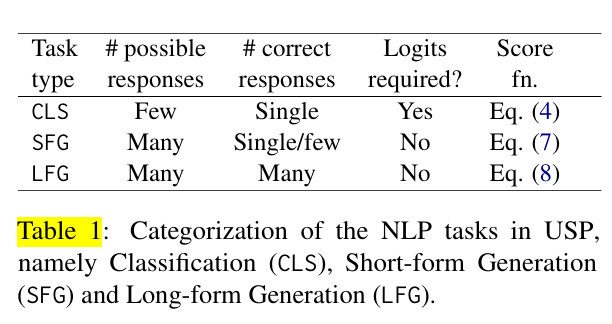

### **Phân loại (Classification - CLS)**  

Dựa theo **Bảng 1**, các bài toán phân loại (CLS) yêu cầu chọn một đáp án chính xác duy nhất từ một số lượng nhỏ các tùy chọn có sẵn. Không gian nhãn $ C $ trong trường hợp này là nhỏ và đã biết trước. Nhiệm vụ là chọn ra lớp có xác suất cao nhất $ C $:  
$$
\hat{z}(j) = \arg\max_{c \in C} P(c|d(j)).
$$  

#### **Khi logits khả dụng:**  
Với trường hợp logits khả dụng, ta không cần sử dụng phương pháp self-consistency để ước tính độ tin cậy của dự đoán. Tuy nhiên, trong một số trường hợp như:  
- **Mô hình được hiệu chỉnh không tốt với logits.**  
- **Self-consistency có lợi hơn** (ví dụ khi sử dụng CoT prompting và giải mã đa đường để tạo ra các luồng suy luận đa dạng), thì phương pháp self-consistency vẫn có thể được lựa chọn.

#### **Hàm điểm số $ F $ cho CLS:**  
Đối với $ p(j) = \text{Concat}(d(j), \hat{z}(j)) \in P $, ta chỉ cần truy vấn LLM một lần và sử dụng **entropy âm** của phân phối trên $ C $ làm hàm điểm số $ F $:  
$$
F_{\text{CLS}}(p(j)|d(j)) := - \sum_{c \in C} \tilde{P}(c|d(j)) \log \tilde{P}(c|d(j)),
$$  
với $ \tilde{P}(c|d(j)) $ là xác suất chuẩn hóa và thỏa mãn:  
$$
\sum_{c \in C} \tilde{P}(c|d(j)) = 1.
$$  

**Lưu ý:**  
- Có thể sử dụng các chỉ số bất định (uncertainty metric) tốt hơn như **semantic uncertainty** (Kuhn et al., 2023) thay vì entropy âm, nhưng nghiên cứu hiện tại không xem xét điều này.

---

#### **Đảm bảo bao phủ không gian nhãn $ C $:**  
Việc đảm bảo bao phủ tốt không gian nhãn đã được chứng minh là quan trọng để đạt hiệu suất cao trong ICL (Min et al., 2022). Để xây dựng tập $ S $:  
- Thay vì đơn giản chọn $ K $ pseudo-demo từ $ P $, ta tạo $ \frac{K}{|C|} $ pseudo-demo cho mỗi $ c \in C $ từ tập con $ P_c \subset P $, với:  
$$
P_c = \{p(j) \in P \mid \hat{z}(j) = c, \, \forall j \in \{1, ..., N_u\}\}.
$$  

#### **Tránh thiên vị trong lựa chọn:**  
Các mô hình LLM có thể tự tin hơn đối với một số lớp, dẫn đến hiện tượng thiên vị. Nếu chỉ chọn các dự đoán tự tin nhất làm pseudo-demo, điều này có thể khiến một số lớp bị lấn át. Để giảm thiểu điều này, ta đảm bảo rằng $ K $ pseudo-demo được chọn bao phủ tất cả các lớp một cách xấp xỉ đều.

#### **Trường hợp lớp không được dự đoán:**  
Một số lớp $ c_u $ có thể không được dự đoán trong tập dữ liệu $ D $ (ví dụ: một mô hình tự tin quá mức có thể không bao giờ dự đoán tùy chọn "không chắc chắn"). Khi đó, tập $ P_c $ trong phương trình trên sẽ rỗng. Để tạo pseudo-demo khả dĩ nhất cho lớp $ c_u $:  
- Chọn các truy vấn $ d(j) \in D $ có giá trị $ P(c = c_u|d(j)) $ cao nhất:  
$$
\text{Top} \, \frac{K}{|C|} \, d(j) \in D \, \text{với} \, P(c = c_u|d(j)).
$$  
- Các truy vấn này sau đó được kết hợp với nhãn lớp $ c_u $ để tạo pseudo-demo cho các lớp không được dự đoán.

### **Sinh ngắn (Short-form Generation - SFG)**  

**Mô tả:**  
SFG là loại bài toán sinh dữ liệu với nhiều câu trả lời có thể, nhưng chỉ có một hoặc một vài câu trả lời chính xác. Ví dụ điển hình bao gồm bài toán trả lời câu hỏi (**Question Answering**).  

Ngoài ra, SFG cũng có thể được áp dụng cho các bài toán phân loại (**CLS**) trong trường hợp:  
1. Sử dụng mô hình dựa trên text-to-text như **T5** (Raffel et al., 2020).  
2. Không có quyền truy cập vào logits hoặc không muốn dựa vào logits.  
3. Khi phương pháp giải mã đa lần (**self-consistency-style multiple decoding**) được ưu tiên hơn.

---

**Đặc điểm:**  
- Không giống như bài toán CLS, trong bài toán SFG, chỉ có quyền truy cập vào đầu ra của mô hình $ \hat{z}(j) $, không có phân phối logits.  
- Điều này bao gồm các bài toán như lý luận số học (**arithmetic reasoning**) trong COSP (Wan et al., 2023), thường sử dụng entropy chuẩn hóa để đánh giá độ tin cậy của mô hình.  
- Đối với các bài toán không sử dụng **CoT prompting**, ta bỏ qua bước sinh diễn giải (**rationale generation**) và chỉ yêu cầu sinh trực tiếp câu trả lời.  

---

### **Quy trình cụ thể:**  
- Với mỗi truy vấn $ d(j) \in D $, ta truy vấn mô hình **m lần** dưới chế độ lấy mẫu nhiệt độ (**temperature sampling**) để thu được **m dự đoán** $ \{ \hat{z}(j)_\ell \}_{\ell=1}^m $.  
- Chỉ những dự đoán thuộc nhóm đa số (**majority predictions**) của mỗi truy vấn được thêm vào tập $ P $:  
$$
P := \text{Maj}\left\{\hat{z}(j)_\ell \right\}_{\ell=1}^m \,\,\, \text{với} \,\,\, j = 1, ..., N_u.
$$  

- Tuy nhiên, để tính toán độ tin cậy của mô hình, tất cả **m dự đoán** đều được sử dụng.

---

### **Hàm điểm số $ F $ cho SFG:**  
Hàm $ F $ được xác định dựa trên entropy chuẩn hóa như sau:  
$$
F_{\text{SFG}}\left(p(j), \{ \hat{z}(j)_\ell \}_{\ell=1}^m \right) := -\frac{1}{\log m} \sum_{\alpha=1}^\mu \tilde{P}\left(\hat{z}(j)_\alpha\right) \log \tilde{P}\left(\hat{z}(j)_\alpha\right),
$$  
trong đó:  
- $ \mu \leq m $: số lượng các câu trả lời duy nhất.  
- $ \tilde{P}\left(\hat{z}(j)_\alpha\right) $: tần suất thực nghiệm của một câu trả lời duy nhất $ \hat{z}(j)_\alpha $ trong tất cả $ m $ dự đoán của $ d(j) $.  
- $ \log m $: giá trị chuẩn hóa để đảm bảo entropy nằm trong khoảng $ [0, 1$$ $.

**Ý nghĩa:**  
Hàm $ F $ đo lường độ tin cậy của mô hình dựa trên phân phối tần suất của các câu trả lời duy nhất. Giá trị entropy thấp cho thấy mô hình tự tin hơn với dự đoán của mình.

### **Sinh Dài (Long-form Generation - LFG)**  

**Mô tả:**  
LFG là nhóm bài toán xử lý ngôn ngữ tự nhiên (NLG) sinh ra các phản hồi dài với nhiều câu trả lời hợp lý. Các ví dụ tiêu biểu bao gồm tóm tắt văn bản (**summarization**) và dịch máy (**translation**).  

Những thách thức trong LFG:  
1. **Entropy không hiệu quả:** Phương trình (7) không thể ước lượng hiệu quả độ tin cậy/không chắc chắn. Điều này là do khi giải mã một truy vấn nhiều lần với nhiệt độ mẫu hóa (**temperature sampling**), khó có khả năng các phản hồi sinh ra giống hệt nhau vì độ dài của câu trả lời.  
2. **Mô hình hóa dựa trên logits không khả thi:** Không gian xác suất chung có kích thước cao và sự phụ thuộc tuần tự giữa các token sinh ra gây khó khăn cho việc sử dụng logits.  

---

### **Quy trình xác định độ tin cậy:**  
- Với mỗi truy vấn $ d(j) \in D $, truy vấn mô hình **m lần** để thu được **m phản hồi** $ \{ \hat{z}(j)_\ell \}_{\ell=1}^m $.  
- Thay vì dùng phương trình (7), tính điểm $ F_{\text{LFG}} $ dựa trên **điểm ROUGE trung bình cặp đôi** giữa tất cả các cặp phản hồi:  
$$
F_{\text{LFG}}(p(j), \{ \hat{z}(j)_\ell \}_{\ell=1}^m) := \frac{1}{m(m-1)} \sum_{\ell=1}^{m} \sum_{\ell' \neq \ell} \text{ROUGE}(\hat{z}(j)_\ell, \hat{z}(j)_{\ell'}),
$$  
trong đó:  
- $ \text{ROUGE}(\cdot) $: Điểm ROUGE giữa hai câu trả lời.  
- Có thể thay thế bằng các thước đo khác như **BLEU**, hoặc **độ tương đồng cosine của embedding câu** từ mô hình phụ trợ.  

---

### **Xây dựng tập pseudo-demo $ S $:**  
1. Không giống SFG, khái niệm "đa số" (**majority**) không rõ ràng với các bài toán LFG.  
2. Sử dụng $ F_{\text{LFG}} $ để xếp hạng độ tin cậy của các truy vấn trong tập $ D $ và chọn ra những truy vấn sử dụng để xây dựng $ S $.  
3. Phần câu trả lời cho các pseudo-demo được sinh lại bằng cách sử dụng **argmax decoding** trên các truy vấn đã chọn để lấy các dự đoán hợp lý nhất (**MLE predictions**).  

---

### **Xử lý outlier (dữ liệu bất thường):**  
Trong sinh văn bản zero-shot, việc mô hình chỉ dựa trên prompt và hướng dẫn có thể dẫn đến việc sinh ra các phản hồi cực kỳ tự tin nhưng không thực sự hoàn thành nhiệm vụ (ví dụ: không tóm tắt đúng yêu cầu).  

**Phát hiện outlier:**  
- Các phản hồi bất thường này thường có điểm $ F_{\text{LFG}} $ cao bất thường.  
- Sử dụng kỹ thuật lọc outlier chuẩn mực: loại bỏ các phản hồi có điểm $ > \text{upper quartile} + 1.5 \times \text{IQR} $, với IQR (Interquartile Range) được tính theo công thức của Tukey (1977).  

**Ý nghĩa:** Việc lọc này giúp giảm thiểu khả năng làm giảm hiệu suất khi sử dụng các pseudo-demo không phù hợp.

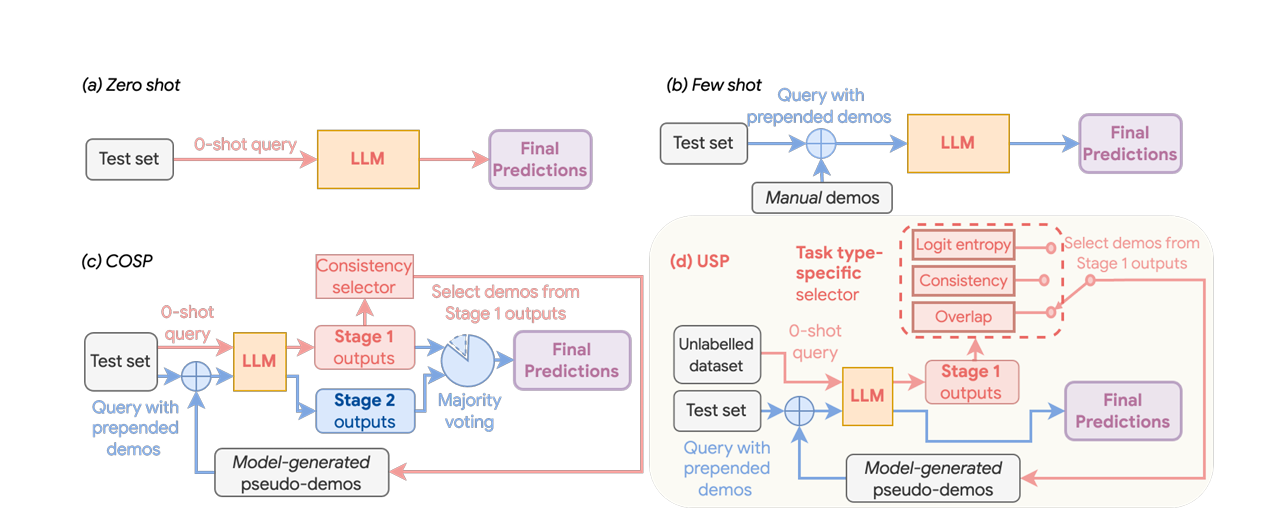

In [ ]:
!pip install instructor

  Using cached jiter-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
Using cached jiter-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
  Attempting uninstall: jiter
    Found existing installation: jiter 0.8.0
    Uninstalling jiter-0.8.0:
      Successfully uninstalled jiter-0.8.0


In [ ]:
!pip install --upgrade openai==1.55.3 instructor

In [ ]:
!pip install openai==1.55.3 httpx==0.27.2 --force-reinstall --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
instructor 1.7.0 requires jiter<0.7,>=0.6.1, but you have jiter 0.8.0 which is incompatible.
jupyter-server 1.24.0 requires anyio<4,>=3.1.0, but you have anyio 4.7.0 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
from pydantic import BaseModel
from typing import Literal
import instructor
from openai import AsyncOpenAI
import asyncio
from collections import defaultdict
import nest_asyncio
loop = asyncio.get_event_loop()

# Apply nest_asyncio to the loop
nest_asyncio.apply(loop)


In [ ]:
class Classification(BaseModel):
    chain_of_thought: str
    label: Literal["Happy", "Angry", "Sadness"]
    confidence: Literal[
        "Uncertain", "Somewhat Confident", "Confident", "Highly Confident"
    ]

    def confidence_score(self) -> int:
        confidence_order = {
            "Highly Confident": 4,
            "Confident": 3,
            "Somewhat Confident": 2,
            "Uncertain": 1,
        }
        return confidence_order[self.confidence]

client = AsyncOpenAI(api_key='sk-RYiDonFCU85Bfr242X2POvCBhlhfHlz8knZQoVjWVJw180s6',
                                              base_url="https://api.chatanywhere.tech/v1")

client = instructor.from_openai(client)
async def generate_prediction(query: str):
  return (
      await client.chat.completions.create(
          model='gpt-4o-mini',
          messages=[
              {
                  'role': 'user',
                  'content': f"""Classify the following query {query} into
                    one of the following categories: Happy, Angry, Sadness""",
              }
          ],
          response_model=Classification,
      ),
      query,
  )

async def generate_predictions(queries: list[str])-> list[tuple[Classification, str]]:
  return await asyncio.gather(*[generate_prediction(query) for query in queries])

def get_balanced_sample(predictions: list[tuple[Classification, str]], k: int):
  label_to_queries: dict[str, list[tuple[Classification, str]]] = defaultdict(list)

  for prediction in predictions:
    label_to_queries[prediction[0].label].append(prediction)

  num_classes = len(label_to_queries)
  num_samples_per_class = k // num_classes

  res: list[str] = []
  for label, label_queries in label_to_queries.items():
    label_queries = sorted(
            label_queries, key=lambda x: x[0].confidence_score(), reverse=True
    )
    label_queries = [
        [label_queries[1] for label_queries in label_queries[:num_samples_per_class]]
    ]
    res.extend([f"{query} ({label})" for query in label_queries])

  return res

async def generate_response_with_examples(query: str, examples: list[str]):
  formatted_examples = "\n".join(examples)
  return await client.chat.completions.create(
      model='gpt-4o-mini',
      response_model=Classification,
      messages=[
          {
              'role': 'system',
              'content': f"""
                 You are a helpful assistant that classifies queries into one of the following categories: Happy, Angry, Sadness.

                Here are some samples of queries and their categories:

                <examples>
                {formatted_examples}
                </examples>

                Here is a user query to classify

                <query>
                {query}
                </query>"""
          }
      ]
  )


In [ ]:
if __name__ == "__main__":
    examples = [
        """
        i do feel that running is a divine experience and
        that i can expect to have some type of spiritual
        encounter
        """,
        """
        i get giddy over feeling elegant in a perfectly
        fitted pencil skirt
        """,
        """
        i plan to share my everyday life stories traveling
        adventures inspirations and handmade creations with
        you and hope you will also feel inspired
        """,
        """
        i need to feel the dough to make sure its just
        perfect
        """,
        """
        i found myself feeling a little discouraged that
        morning
        """,
        "i didnt really feel that embarrassed",
        "i feel like a miserable piece of garbage",
        """
        i feel like throwing away the shitty piece of shit
        paper
        """,
        """
        i feel irritated and rejected without anyone doing
        anything or saying anything
        """,
        "i feel angered and firey",
        """
        im feeling bitter today my mood has been strange the
        entire day so i guess its that
        """,
        "i just feel really violent right now",
        "i know there are days in which you feel distracted",
    ]

    labels = loop.run_until_complete(generate_predictions(examples))
    balanced_sample = get_balanced_sample(labels, 3)
    for sample in balanced_sample:
        print(sample)
        """
        i do feel that running is a divine experience and that i can
        expect to have some type of spiritual encounter (Happy)
        """
        #> i feel like a miserable piece of garbage (Sadness)
        #> i feel like throwing away the shitty piece of shit paper (Angry)

    response = loop.run_until_complete(
        generate_response_with_examples(
            """
            i feel furious that right to life advocates can
            and do tell me how to live and die through
            lobbying and supporting those politicians
            sympathic to their views
            """,
            balanced_sample,
        )
    )
    print(response.model_dump_json(indent=2))
    """
    {
      "chain_of_thought": "The user expresses feelings of
      anger and frustration specifically directed at right
      to life advocates. The language used, such as
      'furious,' indicates a high level of emotion
      associated with anger.",
      "label": "Angry",
      "confidence": "Highly Confident"
    }
    """

['\n        i get giddy over feeling elegant in a perfectly\n        fitted pencil skirt\n        '] (Happy)
['i feel like a miserable piece of garbage'] (Sadness)
['\n        i feel like throwing away the shitty piece of shit\n        paper\n        '] (Angry)
{
  "chain_of_thought": "The user expresses a strong negative feeling, specifically \"furious,\" in relation to right-to-life advocates and their influence on personal decisions about living and dying. The tone of the query conveys anger concerning external pressures and opinions being imposed on them, clearly categorizing this sentiment as \"Angry.\"",
  "label": "Angry",
  "confidence": "Highly Confident"
}


In [ ]:
labels

[(Classification(chain_of_thought='The query expresses a positive sentiment towards running, indicating that it is perceived as a divine and spiritually enriching experience. This suggests feelings of joy and appreciation.', label='Happy', confidence='Confident'),
  '\n        i do feel that running is a divine experience and\n        that i can expect to have some type of spiritual\n        encounter\n        '),
 (Classification(chain_of_thought='The phrase expresses excitement and joy over wearing a perfectly fitted pencil skirt, indicating a positive emotional response associated with feeling elegant and giddy.', label='Happy', confidence='Highly Confident'),
  '\n        i get giddy over feeling elegant in a perfectly\n        fitted pencil skirt\n        '),
 (Classification(chain_of_thought='The query expresses a positive sentiment about sharing stories, adventures, inspirations, and handmade creations. The speaker expresses hope that others will feel inspired, indicating a posi